# ADS 825 - Lecture 02 - Intake
# October 18, 2023

## Dairy Cow Feed Intake Predictions

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score


## Functions for Various Calculations


In [2]:
# Define function for Fat-Corrected Milk (FCM)
def compute_fcm(milk_yield, milk_fat):
    return (0.4 * milk_yield) + (15 * milk_fat)

# Define function for Digestible DM Intake requirements
def digestible_dm(fcm, metabolic_bw, bw_change):
    return 0.526 + (0.333 * fcm) + (0.056 * metabolic_bw) + (3.08 * bw_change)

# Physiologically regulated VDMI - Based on Conrad et al. 1964
def physiologically_regulated_vdmi(digestible_dm, dmd):
    return digestible_dm / (dmd/1000)  # dmd is divided by 1000 to convert g/kg to fraction

# Physically regulated VDMI - Based on Conrad et al. 1964
def physically_regulated_vdmi(bw, dmd):
    return (0.0107 * bw) / (1 - dmd/1000)  # dmd is divided by 1000 to convert g/kg to fraction


# Our cow - parameters to play:

In [3]:
milk_yield = 40                 #kg/d
milk_fat = 1.6                  #kg/d
BW = 600                        #kg
deltaBW = -2                    #kg/d


# Using some auxiliary equations:

In [4]:
# Applying our equations:
fcm = compute_fcm(milk_yield,milk_fat)          #kg/d
bw_075 = BW**0.75                               #kg
dmd = digestible_dm(fcm, bw_075, deltaBW)       #kg/d
dmd

14.474932095713456

#Estimating Intake - Physical Effect -  based on Conrad et al. 1964 #####


In [7]:
# Set 1: Smaller BW and Lower DMD
bw1 = 600  # for example, 100 kg body weight
digest1 = 500  # for example, 500 g/kg DM digestibility
intake_pred_met1 = physically_regulated_vdmi(bw1, digest1)

# Set 2: Larger BW and Higher DMD
bw2 = 600  # for example, 200 kg body weight
digest2 = 700  # for example, 700 g/kg DM digestibility
intake_pred_met2 = physically_regulated_vdmi(bw2, digest2)

print(f"For a body weight of {bw1} kg and dry matter digestibility of {digest1} g/kg DM, the predicted intake is {intake_pred_met1:.2f} kg/day.")
print(f"For a body weight of {bw2} kg and dry matter digestibility of {digest2} g/kg DM, the predicted intake is {intake_pred_met2:.2f} kg/day.")


For a body weight of 600 kg and dry matter digestibility of 500 g/kg DM, the predicted intake is 12.84 kg/day.
For a body weight of 600 kg and dry matter digestibility of 700 g/kg DM, the predicted intake is 21.40 kg/day.


# Estimating Intake - Physiological Effect - based on Conrad et al. 1964


In [8]:
# Set 1: Lower DMD
digestible_dm1 = 14  # for example, 5 kg digestible DM (animal requirement)
digest3 = 500  # for example, 500 g/kg DM digestibility
intake_pred_fill1 = physiologically_regulated_vdmi(digestible_dm1, digest3)

# Set 2: Higher DMD
digestible_dm2 = 14 # for example, 10 kg digestible DM
digest4 = 700  # for example, 700 g/kg DM digestibility
intake_pred_fill2 = physiologically_regulated_vdmi(digestible_dm2, digest4)

print(f"For a digestible DM of {digestible_dm1} kg and dry matter digestibility of {digest3} g/kg DM, the predicted intake is {intake_pred_fill1:.2f} kg/day.")
print(f"For a digestible DM of {digestible_dm2} kg and dry matter digestibility of {digest4} g/kg DM, the predicted intake is {intake_pred_fill2:.2f} kg/day.")


For a digestible DM of 14 kg and dry matter digestibility of 500 g/kg DM, the predicted intake is 28.00 kg/day.
For a digestible DM of 14 kg and dry matter digestibility of 700 g/kg DM, the predicted intake is 20.00 kg/day.


#Mertens 1987

### Our previous paramters:

In [9]:
milk_yield = 40                                 #kg/d
milk_fat = 1.6                                  #kg/d
BW = 600                                        #kg
deltaBW = -2                                    #kg/d
fcm = compute_fcm(milk_yield,milk_fat)          #kg/d
bw_075 = BW**0.75                               #kg
dmd = digestible_dm(fcm, bw_075, deltaBW)       #kg/d
dmd


14.474932095713456

#### Now lets add milk_protein, Dietary Metabolizable Energy, and diet NDF :


In [10]:
milk_protein = 1.6        #kg/d
MEDiet = 8.8              #MJ/kg DM
dietNDF = 0.65                   #%


### ME requirements calculation (MEReq)

In [11]:
k1 = 0.6 # efficiency of ME use for lactation
k2 = 0.4 # efficiency of ME use for gain

MEReq = ((0.95 + 0.38 * milk_fat + 0.21 * milk_protein) * milk_yield) / k1 + (0.420 * bw_075) + (k2 * deltaBW) + 1


# Physiologically Regulated VDMI


In [12]:
VDMI_physiological = MEReq / MEDiet
VDMI_physiological


20.157233793695177

# Mertens Model based on NDF Physical Regulation


In [13]:
def physically_NDF_vdmi(bw, dietndf):
    return (bw * 0.012) / (dietndf)  # dmd is divided by 1000 to convert g/kg to fraction

#NDFintakecapacity = 0.012 * BW

physically_NDF_vdmi(BW, dietNDF)

11.076923076923077

#Creating some plots for ilustration

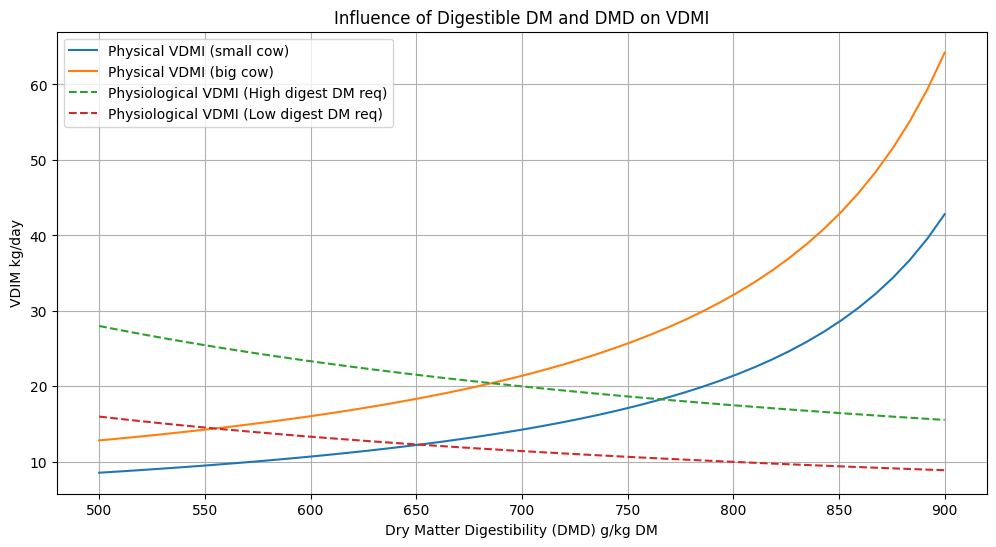

In [14]:
# Define a range of dmd values for plotting
dmd_values = np.linspace(500,900,50)  # DMD values from 500 to 900
average_bw1 = 400
average_bw2 = 600
digestible_dm3 = 8

# Calculate VDIM values using the previously calculated digestible_DM values
physical_vdmi1 = [physically_regulated_vdmi(average_bw1, dmd) for dmd in dmd_values]
physical_vdmi2 = [physically_regulated_vdmi(average_bw2, dmd) for dmd in dmd_values]
physiological_vdmi1 = [physiologically_regulated_vdmi(digestible_dm1, dmd) for dmd in dmd_values]
physiological_vdmi2 = [physiologically_regulated_vdmi(digestible_dm3, dmd) for dmd in dmd_values]


# Plot
plt.figure(figsize=(12, 6))
plt.plot(dmd_values, physical_vdmi1, label='Physical VDMI (small cow)')
plt.plot(dmd_values, physical_vdmi2, label='Physical VDMI (big cow)')
plt.plot(dmd_values, physiological_vdmi1, label='Physiological VDMI (High digest DM req)', linestyle='--')
plt.plot(dmd_values, physiological_vdmi2, label='Physiological VDMI (Low digest DM req)', linestyle='--')


plt.title("Influence of Digestible DM and DMD on VDMI")
plt.xlabel("Dry Matter Digestibility (DMD) g/kg DM")
plt.ylabel("VDIM kg/day")
plt.legend()
plt.grid(True)
plt.show()


# NRC 2021 Intake Predictions
## Lactating Cows
###Equation

In [15]:
def dmiNRC(Parity, MilkE, BW, BCS, DIM):
    return ((3.7 + Parity * 5.7 + 0.305 * MilkE + 0.022 * BW +
             (-0.689 + Parity * -1.87) * BCS) *
            (1 - (0.212 + Parity * 0.136) * np.exp(-0.053 * DIM)))

### Example: Plotting DMI against Days in Milk (DIM) for various values of Parity


In [16]:
DIM_values = np.linspace(0, 300, 100)  # 0 to 300 days in milk
Parity_values = [0,1]  # 1st, 2nd, and 3rd lactation
MilkE = 30  # example value
BW = 600  # example value
BCS = 3  # example value

#Make a plot

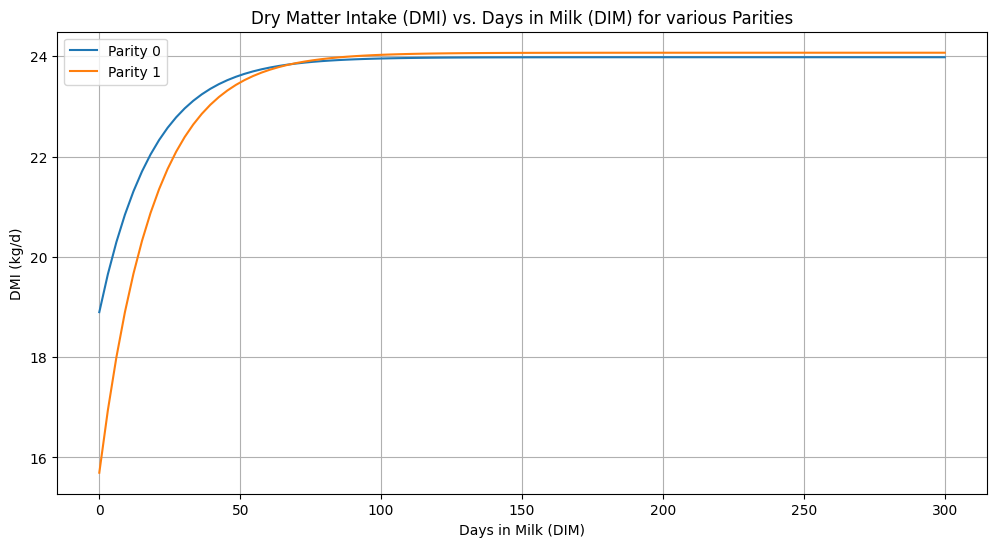

In [17]:
plt.figure(figsize=(12, 6))

for Parity in Parity_values:
    DMI_values = [dmiNRC(Parity, MilkE, BW, BCS, dim) for dim in DIM_values]
    plt.plot(DIM_values, DMI_values, label=f'Parity {Parity}')

plt.title("Dry Matter Intake (DMI) vs. Days in Milk (DIM) for various Parities")
plt.xlabel("Days in Milk (DIM)")
plt.ylabel("DMI (kg/d)")
plt.legend()
plt.grid(True)
plt.show()

# NRC 2021 DMI Prediction
##Filling Effect
### Equation

In [18]:
def nrc_DMI_filling(fNDF, ADF, NDF, fNDFD, MY):
    return (12 - 0.107 * fNDF + 8.17 * (ADF/NDF) + 0.0253 * fNDFD
            - 0.328 * ((ADF/NDF) - 0.602) * (fNDFD - 48.3)
            + 0.225 * MY + 0.0039 * (fNDFD - 48.3) * (MY - 33.1))

In [19]:
#For a cow with:
#fNDF = 45%
#ADF = 25%
#NDF = 55%
#fNDFD = 50%
#MY = 30kg/d

DMI1 = nrc_DMI_filling(45, 25, 55, 50, 30)
DMI1


18.975304018181816

In [20]:
#For another cow with:
#fNDF = 35%
ADF = 25
NDF = 55
fNDFD = 50
#MY = 30kg/d

DMI2 = nrc_DMI_filling(35, 25, 55, 50, 30)
DMI2

20.045304018181817

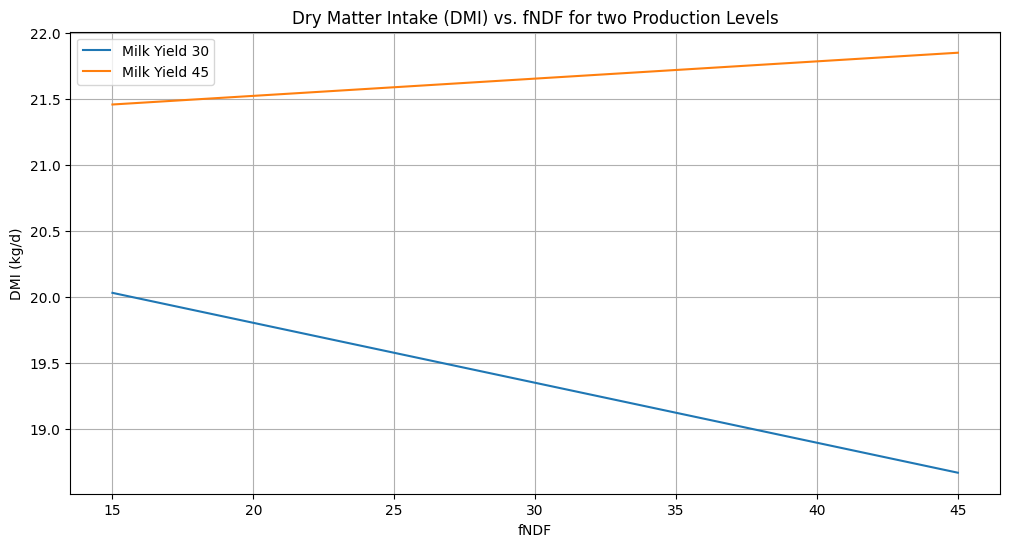

In [21]:
fNDF_values = np.linspace(15, 45, 5)
MY_values = [30,45]
plt.figure(figsize=(12, 6))

for MY in MY_values:
    DMI_values = [nrc_DMI_filling(fNDF, ADF, NDF, fNDF, MY) for fNDF in fNDF_values]
    plt.plot(fNDF_values, DMI_values, label=f'Milk Yield {MY}')

plt.title("Dry Matter Intake (DMI) vs. fNDF for two Production Levels")
plt.xlabel("fNDF")
plt.ylabel("DMI (kg/d)")
plt.legend()
plt.grid(True)
plt.show()